<a href="https://colab.research.google.com/github/redR0b0t/COLAB/blob/dec5examNPTEL/dataScienceNPTEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import io
df_orig=pd.read_csv("https://raw.githubusercontent.com/redR0b0t/COLAB/dec5examNPTEL/bank_marketing.csv")
df_orig

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no
5577,5577,40,blue-collar,married,primary,no,-388,yes,no,cellular,4,may,195,3,340,1,failure,no
5578,5578,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no
5579,5579,46,blue-collar,married,secondary,no,1568,yes,no,cellular,2,jun,310,1,55,6,other,yes


In [7]:
df_orig.isna().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [11]:
df_orig[df_orig.duplicated()]

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [12]:
df_orig.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000
mean,2790.000000,41.169683,1514.736786,15.693603,368.175954,2.507436,52.534313,0.849669
std,1611.240257,11.926044,3266.534626,8.461086,344.131053,2.770717,110.754995,2.311684
min,0.000000,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,1395.000000,32.000000,110.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,2790.000000,39.000000,542.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,4185.000000,49.000000,1747.000000,22.000000,485.000000,3.000000,57.000000,1.000000
max,5580.000000,93.000000,81204.000000,31.000000,3284.000000,63.000000,842.000000,41.000000


In [14]:
df_orig.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [18]:
df_orig.shape

(5581, 18)

In [31]:
df_copy=df_orig.copy()
print(df_copy.shape)
df_copy=df_copy.drop(['Unnamed: 0'],axis=1)
print(df_copy.shape)
df_copy=df_copy.drop_duplicates()
print(df_copy.shape)
df_copy=df_copy.dropna()
print(df_copy.shape)


(5581, 18)
(5581, 17)
(5581, 17)
(5581, 17)


In [48]:
df_copy[df_copy['deposit']=='yes']['age'].describe()

count    2622.000000
mean       41.426773
std        13.560264
min        18.000000
25%        31.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [88]:
df_copy[df_copy['deposit']=='no'].groupby(['campaign'])['contact'].describe()
df_copy[(df_copy['deposit']=='no') & (df_copy['campaign']==1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
11,32,technician,single,tertiary,no,569,no,yes,cellular,29,jan,348,1,-1,0,unknown,no
14,38,blue-collar,divorced,secondary,no,2998,yes,no,unknown,11,jun,91,1,-1,0,unknown,no
21,38,blue-collar,married,primary,no,668,no,no,unknown,8,may,238,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,38,student,single,unknown,no,64,no,no,cellular,6,aug,789,1,-1,0,unknown,no
5564,43,admin.,single,tertiary,no,664,yes,no,cellular,17,apr,119,1,-1,0,unknown,no
5572,45,unknown,married,primary,no,44,no,no,unknown,11,jun,81,1,-1,0,unknown,no
5575,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no


In [92]:
df_copy[df_copy['deposit']=='no'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000
mean,40.941872,1317.306185,16.165934,219.675228,2.833728,38.343697,0.587699
std,10.259777,3026.661738,8.330348,204.734970,3.308879,100.108689,2.245196
min,18.000000,-2712.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,33.000000,55.500000,9.000000,94.000000,1.000000,-1.000000,0.000000
50%,39.000000,403.000000,16.000000,161.000000,2.000000,-1.000000,0.000000
75%,48.000000,1328.000000,22.000000,273.000000,3.000000,-1.000000,0.000000
max,89.000000,56831.000000,31.000000,3284.000000,63.000000,826.000000,41.000000


In [117]:
df_copy.groupby(['deposit']).describe().apply(lambda x: x/x.sum())

age                                    ... previous                       
            count      mean      std  min       25%  ...      min 25% 50%  75%       max
deposit                                              ...                                
no       0.530192  0.497057  0.43072  0.5  0.515625  ...      NaN NaN NaN  0.0  0.577465
yes      0.469808  0.502943  0.56928  0.5  0.484375  ...      NaN NaN NaN  1.0  0.422535

[2 rows x 56 columns]

In [98]:
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no
5577,40,blue-collar,married,primary,no,-388,yes,no,cellular,4,may,195,3,340,1,failure,no
5578,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no
5579,46,blue-collar,married,secondary,no,1568,yes,no,cellular,2,jun,310,1,55,6,other,yes


In [109]:
df_copy['job'].unique()
df_copy[df_copy['job']=='management'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,40.303490,1765.643399,15.822458,361.532625,2.628983,53.106980,0.896813
std,9.796355,3143.969344,8.808192,344.311581,3.045039,109.878209,2.232494
min,22.000000,-2712.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,8.000000,132.250000,1.000000,-1.000000,0.000000
50%,38.000000,618.500000,16.000000,245.500000,2.000000,-1.000000,0.000000
75%,48.000000,2226.750000,22.750000,479.000000,3.000000,84.000000,1.000000
max,69.000000,34230.000000,31.000000,2770.000000,63.000000,804.000000,28.000000


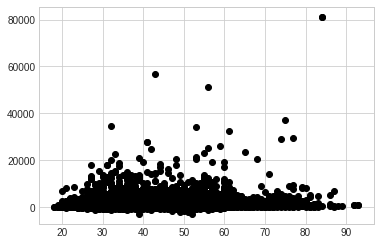

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
x = np.linspace(0, 10, 30)
y = np.sin(x)
x=df_copy['age']
y=df_copy['balance']

plt.plot(x, y, 'o', color='black');

In [125]:
df_copy[(df_copy['deposit']=='yes') &(df_copy['job']=='unemployed')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5,26,unemployed,single,secondary,no,632,no,no,cellular,12,feb,218,1,-1,0,unknown,yes
10,51,unemployed,married,secondary,no,1416,no,no,cellular,9,sep,345,1,-1,0,unknown,yes
243,26,unemployed,single,tertiary,no,814,no,no,cellular,28,jan,1387,1,-1,0,unknown,yes
252,28,unemployed,married,primary,no,7459,yes,no,cellular,2,feb,981,5,269,2,failure,yes
440,56,unemployed,married,secondary,no,0,no,no,telephone,2,feb,492,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,37,unemployed,single,secondary,no,381,yes,no,unknown,8,may,985,2,-1,0,unknown,yes
5377,31,unemployed,married,secondary,no,6,no,no,cellular,4,jun,121,4,-1,0,unknown,yes
5422,48,unemployed,divorced,secondary,no,201,no,no,cellular,10,nov,594,1,91,1,success,yes
5464,25,unemployed,single,tertiary,no,343,no,no,cellular,1,jun,377,1,-1,0,unknown,yes


In [131]:
df_copy.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [134]:
df_pred=df_copy.copy()
df_pred

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no
5577,40,blue-collar,married,primary,no,-388,yes,no,cellular,4,may,195,3,340,1,failure,no
5578,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no
5579,46,blue-collar,married,secondary,no,1568,yes,no,cellular,2,jun,310,1,55,6,other,yes


In [136]:
pd.get_dummies(df_pred,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','deposit'])

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,41,88,11,105,1,336,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,56,1938,26,229,1,192,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,30,245,8,187,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,34,1396,17,630,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,29,-13,14,512,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,48,2235,15,755,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
5577,40,-388,4,195,3,340,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5578,27,91,4,157,6,95,37,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5579,46,1568,2,310,1,55,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [137]:
df_pred=pd.get_dummies(df_pred,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','deposit'])

In [158]:
from sklearn.model_selection import train_test_split
X=df_pred.iloc[:,:-2]
y=df_pred.iloc[:,-1]
# y=y.replace(0,'no')
# y=y.replace(1,'yes')
print(X)
print(y) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

      age  balance  day  ...  poutcome_other  poutcome_success  poutcome_unknown
0      41       88   11  ...               0                 0                 0
1      56     1938   26  ...               0                 1                 0
2      30      245    8  ...               0                 0                 1
3      34     1396   17  ...               0                 0                 1
4      29      -13   14  ...               0                 0                 1
...   ...      ...  ...  ...             ...               ...               ...
5576   48     2235   15  ...               0                 0                 1
5577   40     -388    4  ...               0                 0                 0
5578   27       91    4  ...               1                 0                 0
5579   46     1568    2  ...               1                 0                 0
5580   39        0    8  ...               0                 0                 1

[5581 rows x 51 columns]
0 

In [159]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
y_pred = regressor.predict(X_test)
y_pred

array([0.65776077, 0.33617741, 0.19049076, ..., 0.51474428, 0.60185814,
       0.96434229])

In [174]:
from sklearn.metrics import accuracy_score
print(y_test.array.to_numpy().tolist())
# print(y_pred.tolist())
y_p=[round(num, ) for num in y_pred.tolist()]
print(y_p)

accuracy_score(y_test, y_p)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 

0.8155223880597015

In [175]:
from sklearn.model_selection import train_test_split
X=df_pred.iloc[:,:-2]
y=df_pred.iloc[:,-1]
y=y.replace(0,'no')
y=y.replace(1,'yes')
print(X)
print(y) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

      age  balance  day  ...  poutcome_other  poutcome_success  poutcome_unknown
0      41       88   11  ...               0                 0                 0
1      56     1938   26  ...               0                 1                 0
2      30      245    8  ...               0                 0                 1
3      34     1396   17  ...               0                 0                 1
4      29      -13   14  ...               0                 0                 1
...   ...      ...  ...  ...             ...               ...               ...
5576   48     2235   15  ...               0                 0                 1
5577   40     -388    4  ...               0                 0                 0
5578   27       91    4  ...               1                 0                 0
5579   46     1568    2  ...               1                 0                 0
5580   39        0    8  ...               0                 0                 1

[5581 rows x 51 columns]
0 

In [176]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [182]:
y_pred=neigh.predict(X_test)
print(y_test.to_numpy().tolist())
print(y_pred.tolist())

['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'y

In [178]:
accuracy_score(y_test, y_pred)

0.7546268656716418